### Imports

In [11]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pydicom

## Cargar la data

In [13]:
train_df = pd.read_csv("data/train.csv")
train_bbox = pd.read_csv("data/train_bounding_boxes.csv")

# Print dataframe shapes
print('forma de:', train_df.shape)
print('train bounding-box shape:', train_bbox.shape)
print('')

# Show first few entries
train_df.head(3)

forma de: (2019, 9)
train bounding-box shape: (7217, 6)



,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0


In [14]:
print(f'Pacientes con medidas de bounding box: {train_bbox["StudyInstanceUID"].nunique()} ({np.round(100*train_bbox["StudyInstanceUID"].nunique()/len(train_df),1)} %)')

Pacientes con medidas de bounding box: 235 (11.6 %)


El 11.6% de los pacientes tienen un caja en la imágen señalando la fractura.

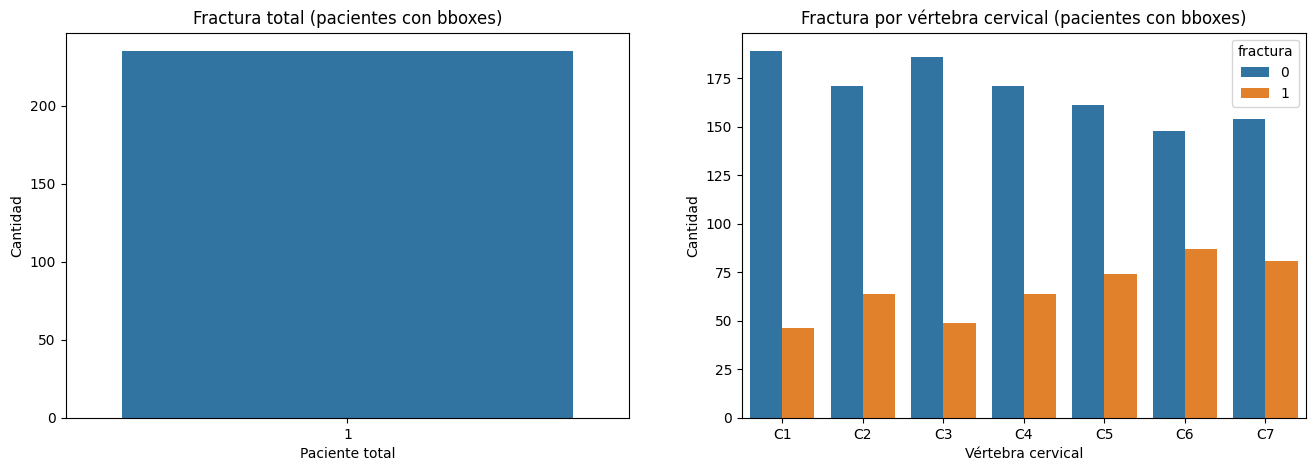

In [19]:
# Filtramos el DataFrame para incluir solo los estudios con bboxes
train_df_bbox = train_df[train_df["StudyInstanceUID"].isin(train_bbox["StudyInstanceUID"])]

# Creamos las subparcelas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Primer gráfico: Fractura total en pacientes con bboxes
sns.countplot(x="patient_overall", data=train_df_bbox, ax=ax1)
ax1.set_title("Fractura total (pacientes con bboxes)")
ax1.set_xlabel("Paciente total")  # Etiqueta del eje x
ax1.set_ylabel("Cantidad")  # Etiqueta del eje y

# Convertimos el DataFrame para el segundo gráfico (fracturas por vértebra cervical)
train_df_bbox_melt = pd.melt(train_df_bbox, id_vars=["StudyInstanceUID", "patient_overall"], 
                             var_name="vertebra_cervical", value_name="fractura")

# Segundo gráfico: Fracturas por vértebra cervical
sns.countplot(x="vertebra_cervical", hue="fractura", data=train_df_bbox_melt, ax=ax2)
ax2.set_title("Fractura por vértebra cervical (pacientes con bboxes)")
ax2.set_xlabel("Vértebra cervical")  # Etiqueta del eje x
ax2.set_ylabel("Cantidad")  # Etiqueta del eje y

# Mostramos los gráficos
plt.show()


### Observaciones:
- Se muestra el número total de pacientes con fracturas, sin especificar qué vértebra fue afectada.
- La barra (del grafico izquierdo) es única y parece mostrar que todos los pacientes tienen al menos una fractura (indicado por un valor "1" en el eje horizontal).
- El conteo de pacientes es mayor a 200.
- Se muestra el número de fracturas clasificadas por cada una de las siete vértebras cervicales (de C1 a C7).
- Las barras azules representan los casos sin fracturas (valor 0), mientras que las barras naranjas representan los casos con fracturas (valor 1).
- Las vértebras C1, C2 y C3 tienen el mayor número de fracturas, con más de 50 casos en C1 y C2.
- Las vértebras C4, C5, C6 y C7 tienen un número menor de fracturas en comparación, con C6 y C7 siendo las menos afectadas.

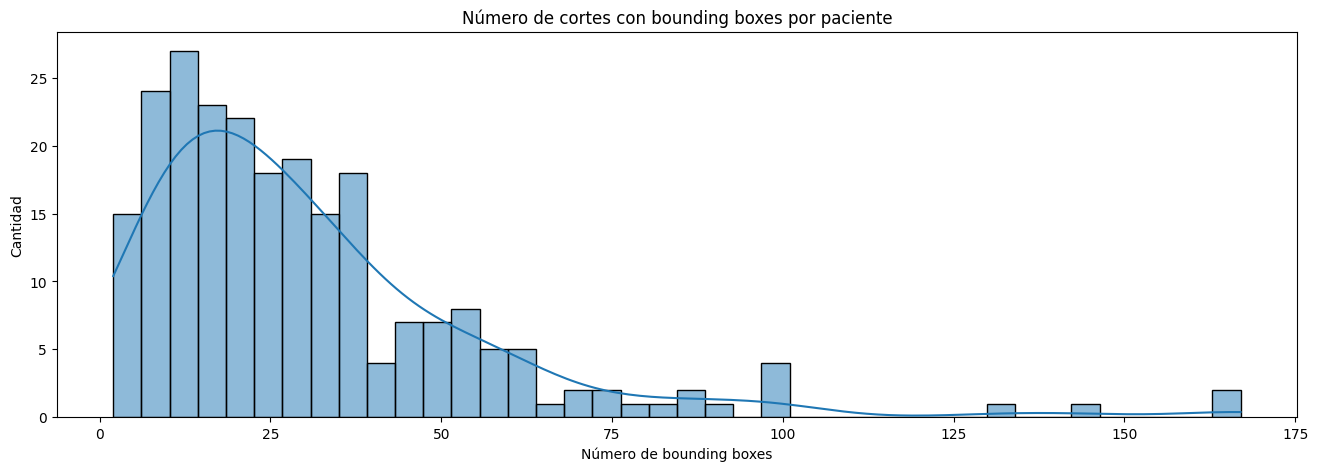

In [20]:
plt.figure(figsize=(16, 5))

# Graficamos el histograma con línea kde
sns.histplot(train_bbox["StudyInstanceUID"].value_counts().values, kde=True, bins=40)

# Título y etiquetas en español
plt.title('Número de cortes con bounding boxes por paciente')
plt.xlabel('Número de bounding boxes')
plt.ylabel('Cantidad')

# Mostramos el gráfico
plt.show()


### Observaciones:
- La mayoría de los pacientes tienen entre 10 y 40 imágenes con bounding boxes, con un pico alrededor de las 20-25 imágenes, lo que indica que este es el rango más común de imágenes anotadas por paciente.
- Hay una distribución decreciente a medida que aumenta el número de bounding boxes. Solo unos pocos pacientes tienen más de 75 imágenes con bounding boxes.
- La curva suavizada superpuesta muestra que la distribución tiene una forma asimétrica, con una caída significativa en los pacientes que tienen más de 50 bounding boxes.
- En el extremo derecho, hay pocos casos con más de 100 imágenes anotadas por paciente, siendo valores atípicos o excepcionales.

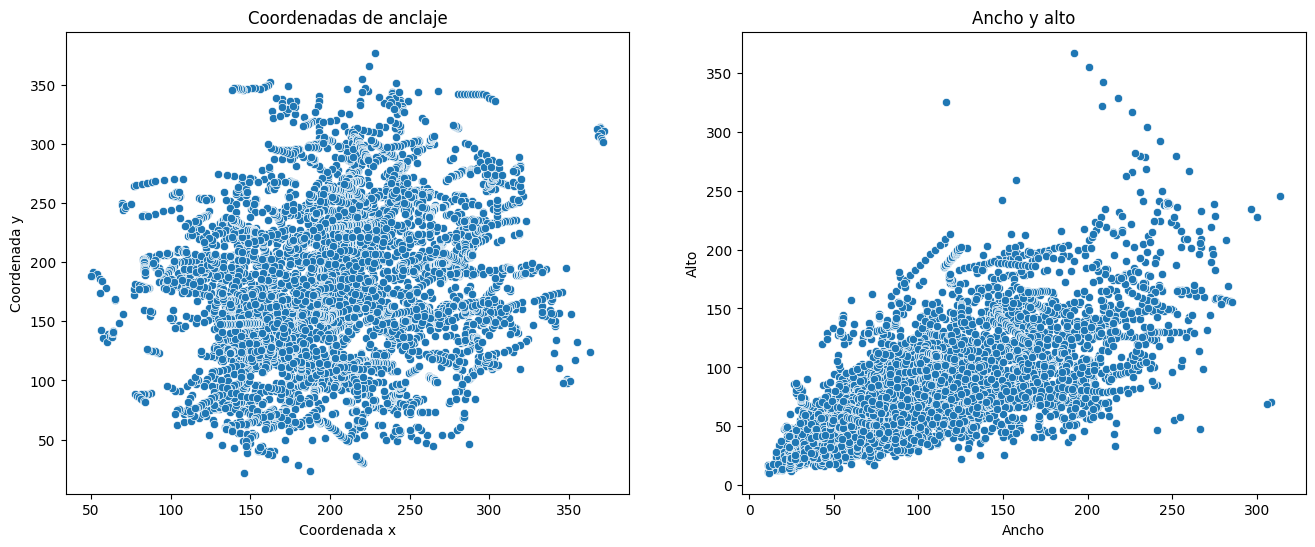

In [21]:
plt.figure(figsize=(16, 6))

# Primer gráfico: Coordenadas de anclaje
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_bbox, x='x', y='y')
plt.title('Coordenadas de anclaje')
plt.xlabel('Coordenada x')  # Etiqueta del eje x
plt.ylabel('Coordenada y')  # Etiqueta del eje y

# Segundo gráfico: Ancho y alto
plt.subplot(1, 2, 2)
sns.scatterplot(data=train_bbox, x='width', y='height')
plt.title('Ancho y alto')
plt.xlabel('Ancho')  # Etiqueta del eje x
plt.ylabel('Alto')   # Etiqueta del eje y

# Mostramos los gráficos
plt.show()

### Observaciones:
- (grafico 1) La distribución dispersa sugiere que las fracturas pueden ocurrir en diversas localizaciones de la columna cervical.
- La concentración de puntos en el centro indica que muchas fracturas o áreas de interés tienden a estar en el centro de las imágenes, lo cual es lógico para imágenes médicas centradas en la columna vertebral.
- (grafico 2) Este gráfico muestra las dimensiones de los bounding boxes utilizados para marcar las áreas de interés en las imágenes.
- La relación positiva entre ancho y altura sugiere que las fracturas o áreas marcadas tienden a mantener cierta proporcionalidad.
- La mayor densidad en la parte inferior izquierda indica que muchos bounding boxes son relativamente pequeños, lo que podría corresponder a fracturas localizadas o sutiles.
- Los puntos más dispersos en la parte superior derecha podrían representar fracturas más extensas o áreas más grandes de interés.